# EDA No. 7  AAA Project Martin George mgeorgevienna@gmail.com

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('member_sample.csv', index_col = 0)

# Application of using GAIN LIFT  on a model on AAA data

In [2]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.4+ MB


Index(['Individual Key', 'Household Key', 'Member Flag', 'City',
       'State - Grouped', 'ZIP5', 'ZIP9', 'FSV CMSI Flag',
       'FSV Credit Card Flag', 'FSV Deposit Program Flag',
       ...
       'SC Vehicle Manufacturer Name', 'SC Vehicle Model Name',
       'SVC Facility Name', 'SVC Facility Type', 'Total Cost',
       'Tow Destination Latitude', 'Tow Destination Longitude',
       'Tow Destination Name', 'Was Duplicated', 'Was Towed To AAR Referral'],
      dtype='object', length=112)

In [3]:
df.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [4]:
df.groupby('FSV CMSI Flag').mean()

,Individual Key,Household Key,ZIP5,ZIP9,Length Of Residence,Do Not Direct Mail Solicit,Email Available,ERS ENT Count Year 1,ERS ENT Count Year 2,ERS ENT Count Year 3,...,Member Match Flag,Member Number and Associate ID,Plus Cost,Premier Cost,Rec ID,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Was Duplicated,Was Towed To AAR Referral
FSV CMSI Flag,,,,,,,,,,,,,,,,,,,,,
N,3.403291e+07,1.600860e+07,2947.671848,2.948020e+07,11.552839,0.054041,0.52604,0.517824,0.921864,0.952447,...,1.0,1.091986e+07,3.445604,0.007301,7.547582e+06,47.235372,15.061851,-26.004476,0.065296,0.013603
Y,2.398762e+07,1.515128e+07,2885.457413,2.885794e+07,11.088766,0.027340,0.75184,0.531746,1.193878,1.090703,...,1.0,1.071187e+07,3.543250,0.000000,7.923508e+06,47.935754,16.165954,-27.896361,0.062745,0.014379


# Consider a classification problem. 

In [5]:
def yn(x):
    return x.replace('N',0).replace('Y',1)
    

In [6]:
 products_c= [i for i in df.columns if i.startswith('FSV')]

In [7]:
products = df[[i for i in df.columns if i.startswith('FSV')]]

In [8]:
products

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
0,N,N,N,N,N,N
1,N,Y,N,N,N,N
2,N,Y,N,N,N,N
3,N,Y,N,N,N,N
4,N,Y,N,N,N,N
5,N,Y,N,N,N,N
6,N,Y,N,N,N,N
7,N,Y,N,N,N,N
8,N,Y,N,N,N,N
9,N,Y,N,N,N,N


In [ ]:
#products['FSV CMSI Flag'].apply(yn)

In [10]:
products

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
0,N,N,N,N,N,N
1,N,Y,N,N,N,N
2,N,Y,N,N,N,N
3,N,Y,N,N,N,N
4,N,Y,N,N,N,N
5,N,Y,N,N,N,N
6,N,Y,N,N,N,N
7,N,Y,N,N,N,N
8,N,Y,N,N,N,N
9,N,Y,N,N,N,N


In [24]:
products = products.apply(yn)

In [25]:
products

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


In [26]:
model_df = pd.concat([products , df[['Household Key','Total Cost']]], axis=1)

In [27]:
model_df

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,Household Key,Total Cost
0,0,0,0,0,0,0,10462590.0,NaN
1,0,1,0,0,0,0,4500791.0,32.50
2,0,1,0,0,0,0,4500791.0,30.00
3,0,1,0,0,0,0,4500791.0,32.50
4,0,1,0,0,0,0,4500791.0,30.00
5,0,1,0,0,0,0,4500791.0,53.00
6,0,1,0,0,0,0,4500791.0,30.00
7,0,1,0,0,0,0,4500791.0,32.00
8,0,1,0,0,0,0,4500791.0,32.00
9,0,1,0,0,0,0,4500791.0,32.50


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
lgr = LogisticRegression()
gbr = GradientBoostingClassifier()

In [30]:
#model_df_g = model_df.groupby(['Household Key'])['FSV CMSI Flag'].sum()

In [31]:
#model_df_g

In [32]:
model_df_g = model_df.groupby(['Household Key']).sum()

In [33]:
model_df_g = model_df.groupby(['Household Key']).sum()

In [34]:
mg = model_df_g.dropna()

In [35]:
mg.shape

(5241, 7)

In [36]:
model_df_g

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,Total Cost
Household Key,,,,,,,
875.0,0,1,0,0,0,0,1063.20
969.0,0,0,0,0,0,0,226.10
3338.0,0,0,0,0,0,0,0.00
8718.0,0,0,0,0,0,0,0.00
11524.0,0,0,0,0,0,0,294.25
13422.0,0,0,0,0,0,0,118.85
19747.0,0,0,0,0,0,0,0.00
20469.0,1,0,0,0,0,0,537.25
20850.0,0,0,0,0,0,0,0.00


# Apply classificaiton model ( Logistics and GredeintBoost)  on 'FSV CMSI Flag' and ' FSV Credit Card Flag'  and compare the gain lift in each model.

In [37]:
X = model_df_g[['Total Cost']]

In [38]:
y = model_df_g[['FSV CMSI Flag']]

In [39]:
y = np.where(y>0,1,0)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [43]:

lgr.fit(X_train, y_train)

predicted_probas = lgr.predict_proba(X_test)



C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


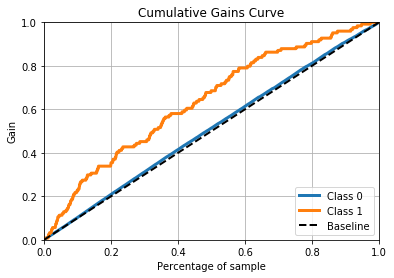

In [44]:
# The magic happens here

import matplotlib.pyplot as plt

import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

plt.show()

In [45]:

gbr.fit(X_train, y_train)

predicted_probas = gbr.predict_proba(X_test)



C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


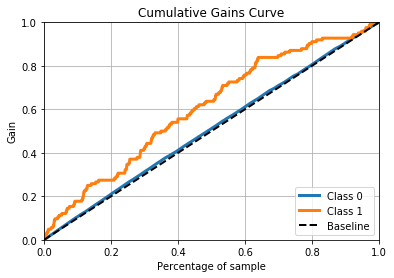

In [46]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

plt.show()

In [47]:
lgr.score(X,y)

0.9297843922915474

In [48]:
gbr.score(X,y)

0.9328372448006106

In [49]:
y = model_df_g[['FSV Credit Card Flag']]

In [50]:
y = np.where(y>0,1,0)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [52]:
lgr.fit(X_train, y_train)

predicted_probas = lgr.predict_proba(X_test)


C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


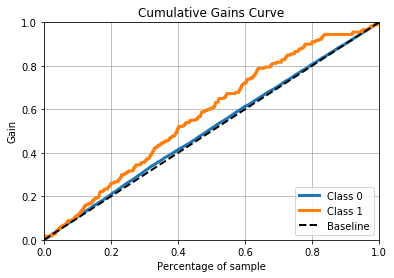

In [53]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

plt.show()

In [54]:
lgr.score(X,y)

0.8895248998282771

In [55]:
gbr.fit(X_train, y_train)

predicted_probas = gbr.predict_proba(X_test)

C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


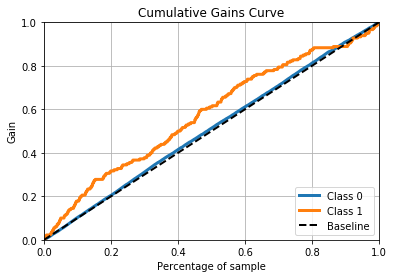

In [56]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)

plt.show()

In [57]:
gbr.score(X,y)

0.8912421293646251

In [63]:
model_df_g['FSV Credit Card Flag'].value_counts()

0     4663
1      341
2       84
3       65
4       29
6       15
5       12
7        8
9        8
8        4
11       3
10       2
13       2
12       2
15       1
14       1
17       1
Name: FSV Credit Card Flag, dtype: int64

In [65]:
model_data = np.where(model_df_g>0,1,0)

In [68]:
model_data

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

# Drawing ROC curve

## One of the most commonly used metrics nowadays is AUC-ROC (Area Under Curve - Receiver Operating Characteristics) curve. ROC curves are pretty easy to understand and evaluate once there is a good understanding of confusion matrix and different kinds of errors.

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [88]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [96]:
probs = lgr.predict_proba(X_test)

In [97]:
probs

array([[0.89739947, 0.10260053],
       [0.86989481, 0.13010519],
       [0.89321462, 0.10678538],
       ...,
       [0.89739947, 0.10260053],
       [0.89479453, 0.10520547],
       [0.89739947, 0.10260053]])

In [98]:
probs = probs[:, 1]

In [99]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.58


In [100]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

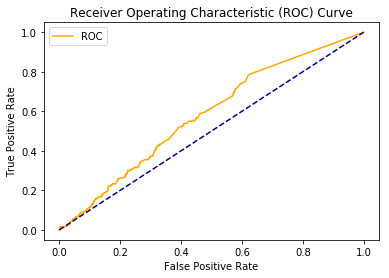

In [101]:
plot_roc_curve(fpr, tpr)

In [89]:
probs = gbr.predict_proba(X_test)

In [90]:
probs

array([[0.93032273, 0.06967727],
       [0.81500049, 0.18499951],
       [0.85242294, 0.14757706],
       ...,
       [0.93032273, 0.06967727],
       [0.81036009, 0.18963991],
       [0.93032273, 0.06967727]])

In [91]:
probs = probs[:, 1]

In [92]:
probs

array([0.06967727, 0.18499951, 0.14757706, ..., 0.06967727, 0.18963991,
       0.06967727])

In [93]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.58


In [94]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

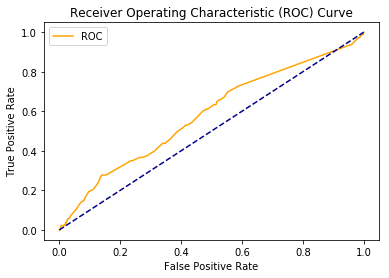

In [95]:
plot_roc_curve(fpr, tpr)

# We can see that ROC AUC score of both classifiers are same. But the ROC curve of Gradient Boosting Regression has advantage as there is a clear improvement  of  ROC before 20% in True positive cases.

## AUC-ROC curve is one of the most commonly used metrics to evaluate the performance of machine learning algorithms particularly in the cases where we have imbalanced datasets.